## Final Project Submission

Please fill out:
* Student name: Myrna Grace Calip
* Student pace: Part-Time
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL:


# Overview
Microsoft is looking to create a movie studio using the following movie datasets:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

As a part of the Microsoft Film Analytics team, we are using our knowledge understand the given data to find which types of films are currently doing the best at the box office. 

## Business Problem
What type of films Microsoft should invest in to create a profitable and successful movie?

## Business Value

Many factors are considered into a production of a film. Funding, directors, genre, and ratings are highly regarded to avid movie goers. In order to maximize the success of Microsoft's movie production we will need to focus on the following questions:

- What genre are the most popular?
- Which movie ratings (G, PG, PG-13, R) generates the most profit?
- When is the best time to release a film?
- 

Once we gather our information we will determine the recommendations Microsoft needs to release a film that will catch the eye of the audience. 

# What can we find from the data given to us?
We need to follow certain steps in order to find valuable information from our data.
1. Load and explore the data
2. Sort out what data we should use 
3. Find the information we need to gain insights

## What movie genre should we invest in?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    

%matplotlib inline

In [2]:
# Load The Movie Data Base to get an overview of the data
tmdb_movies = 'tmdb.movies.csv.gz'

df_tmdb_movies = pd.read_csv(f'zippedData/{tmdb_movies}', index_col=0)
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
# Get general statistics of the numerical values
df_tmdb_movies_stats = df_tmdb_movies.describe()
df_tmdb_movies_stats

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


Here are the stats of the 

In [4]:
# check for duplicates in the dataset
df_tmdb_movies[df_tmdb_movies.duplicated()]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
2536,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
2673,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677
2717,"[35, 18, 14, 27, 9648]",45649,en,Rubber,8.319,2010-09-01,Rubber,5.9,417
...,...,...,...,...,...,...,...,...,...
26481,"[35, 18]",270805,en,Summer League,0.600,2013-03-18,Summer League,4.0,3
26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1
26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


In [5]:
# drop the duplicates
df_tmdb_movies = df_tmdb_movies.drop_duplicates()
df_tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [6]:
df_tmdb_movies.sort_values('genre_ids')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
11735,"[10402, 10749, 18]",271164,en,The Song 2014,3.905,2014-09-26,The Song 2014,5.9,45
9992,"[10402, 10749, 18]",605434,en,bare: A Rock Musical,0.600,2013-09-06,bare: A Rock Musical,10.0,1
8527,"[10402, 10749, 35, 18]",214100,en,Sunshine on Leith,3.945,2013-10-03,Sunshine on Leith,6.7,64
14538,"[10402, 10749, 35, 18]",207936,en,Tumbledown,7.004,2015-04-18,Tumbledown,6.4,88
1077,"[10402, 10749, 35]",60279,hu,Made in Hungária,1.400,2009-10-17,Made in Hungaria,6.9,4
...,...,...,...,...,...,...,...,...,...
4842,[],314841,en,Immersive Cocoon,0.600,2011-03-23,Immersive Cocoon,5.5,2
22607,[],437448,en,The Letter Carrier,0.895,2017-01-27,The Letter Carrier,10.0,1
6975,[],426435,en,The Green Ruby Pumpkin,0.626,2012-10-15,The Green Ruby Pumpkin,6.0,1
4850,[],155098,en,Por El Camino,0.600,2011-06-09,Beyond the Road,5.5,2


In [7]:
df_tmdb_movies = df_tmdb_movies.loc[df_tmdb_movies['genre_ids'] != '[]']
df_tmdb_movies.shape
df_tmdb_movies.sort_values('genre_ids', ascending=False).head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13496,[99],257401,en,Life After Pi,0.600,2014-02-27,Life After Pi,7.4,7
4117,[99],305346,en,Back to Space-Con,0.840,2011-02-26,Back to Space-Con,6.5,1
12744,[99],253305,en,Evolution of a Criminal,0.968,2014-03-08,Evolution of a Criminal,8.0,4
4126,[99],265496,en,Bermuda Triangle Exposed,0.840,2011-03-21,Bermuda Triangle Exposed,6.0,1
4125,[99],381427,en,Rocky Mountain Express,0.840,2011-09-30,Rocky Mountain Express,6.0,1


In [8]:
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23036 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          23036 non-null  object 
 1   id                 23036 non-null  int64  
 2   original_language  23036 non-null  object 
 3   original_title     23036 non-null  object 
 4   popularity         23036 non-null  float64
 5   release_date       23036 non-null  object 
 6   title              23036 non-null  object 
 7   vote_average       23036 non-null  float64
 8   vote_count         23036 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [9]:
df_tmdb_movies = df_tmdb_movies.drop(["title", "original_language"], axis=1)
df_tmdb_movies

,genre_ids,id,original_title,popularity,release_date,vote_average,vote_count
0,"[12, 14, 10751]",12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
1,"[14, 12, 16, 10751]",10191,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
2,"[12, 28, 878]",10138,Iron Man 2,28.515,2010-05-07,6.8,12368
3,"[16, 35, 10751]",862,Toy Story,28.005,1995-11-22,7.9,10174
4,"[28, 878, 12]",27205,Inception,27.920,2010-07-16,8.3,22186
...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,Laboratory Conditions,0.600,2018-10-13,0.0,1
26513,"[18, 53]",485975,_EXHIBIT_84xxx_,0.600,2018-05-01,0.0,1
26514,"[14, 28, 12]",381231,The Last One,0.600,2018-10-01,0.0,1
26515,"[10751, 12, 28]",366854,Trailer Made,0.600,2018-06-22,0.0,1


In [10]:
# Import and inspect the data for inconsistencies
imbd_title = 'imdb.title.basics.csv.gz'

imbd_title_data = pd.read_csv(f'zippedData/{imbd_title}')
imbd_title_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [11]:
imbd_title_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [12]:
# Checks how many total missing values are in each column
imbd_title_data.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [13]:
# Remove the missing values 
imbd_title_data.dropna(subset=["genres","original_title", "runtime_minutes"], inplace=True)
imbd_title_data.info()
imbd_title_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [14]:
# Drop runtime_minutes and original title and double check if there are any missing values
imbd_title_data = imbd_title_data.drop(["original_title", "runtime_minutes"], axis = 1)
imbd_title_data.isna().sum()
imbd_title_data

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,Comedy
...,...,...,...,...
146134,tt9916160,Drømmeland,2019,Documentary
146135,tt9916170,The Rehearsal,2019,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,Documentary
146137,tt9916190,Safeguard,2019,"Drama,Thriller"


In [15]:
imbd_title_data = imbd_title_data.rename(columns={"primary_title": "original_title"})
imbd_title_data

,tconst,original_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,Comedy
...,...,...,...,...
146134,tt9916160,Drømmeland,2019,Documentary
146135,tt9916170,The Rehearsal,2019,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,Documentary
146137,tt9916190,Safeguard,2019,"Drama,Thriller"


In [16]:
imbd_tmdb_df = imbd_title_data.merge(df_tmdb_movies, on = "original_title")
imbd_tmdb_df

,tconst,original_title,start_year,genres,genre_ids,id,popularity,release_date,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,2018,Drama,"[35, 18]",299782,9.800,2018-11-02,7.0,64
1,tt0192528,Heaven & Hell,2018,Drama,[18],567662,0.600,2018-11-06,7.5,2
2,tt0249516,Foodfight!,2012,"Action,Animation,Comedy","[16, 28, 35, 10751]",116977,4.705,2013-05-07,2.1,46
3,tt0255820,Return to Babylon,2013,"Biography,Comedy,Drama","[35, 18]",323498,0.877,2013-08-11,7.0,1
4,tt0285252,Life's a Beach,2012,Comedy,[35],112074,1.206,2010-01-01,3.2,3
...,...,...,...,...,...,...,...,...,...,...
17017,tt9546954,Reel Rock 13,2018,"Documentary,Sport",[99],575513,0.699,2018-11-01,9.5,1
17018,tt9584192,A Haunting on Finn Road: The Devil's Grove,2018,Documentary,"[99, 27]",573004,0.697,2018-10-26,10.0,1
17019,tt9647790,Celia,2018,Documentary,[18],334204,1.400,2012-10-26,5.7,3
17020,tt9678886,Vacancy,2018,Documentary,"[35, 27]",475066,0.649,2017-10-27,9.0,1


In [17]:
imbd_tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17022 entries, 0 to 17021
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          17022 non-null  object 
 1   original_title  17022 non-null  object 
 2   start_year      17022 non-null  int64  
 3   genres          17022 non-null  object 
 4   genre_ids       17022 non-null  object 
 5   id              17022 non-null  int64  
 6   popularity      17022 non-null  float64
 7   release_date    17022 non-null  object 
 8   vote_average    17022 non-null  float64
 9   vote_count      17022 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.4+ MB


In [18]:
imbd_tmdb_df = imbd_tmdb_df.drop(["tconst", "genre_ids", "id", "start_year"], axis = 1)
imbd_tmdb_df

,original_title,genres,popularity,release_date,vote_average,vote_count
0,The Other Side of the Wind,Drama,9.800,2018-11-02,7.0,64
1,Heaven & Hell,Drama,0.600,2018-11-06,7.5,2
2,Foodfight!,"Action,Animation,Comedy",4.705,2013-05-07,2.1,46
3,Return to Babylon,"Biography,Comedy,Drama",0.877,2013-08-11,7.0,1
4,Life's a Beach,Comedy,1.206,2010-01-01,3.2,3
...,...,...,...,...,...,...
17017,Reel Rock 13,"Documentary,Sport",0.699,2018-11-01,9.5,1
17018,A Haunting on Finn Road: The Devil's Grove,Documentary,0.697,2018-10-26,10.0,1
17019,Celia,Documentary,1.400,2012-10-26,5.7,3
17020,Vacancy,Documentary,0.649,2017-10-27,9.0,1


In [19]:
# organize_multiple_genres = imbd_tmdb_df.genres.str.split(",", expand=True)
# organize_multiple_genres

def first_genre_listed(n):
    # Return only the first genre listed
    n = str(n)
    if n == '\\N':
        return ''
    return n.split(',')[0].strip()

imbd_tmdb_df['genres'] = imbd_tmdb_df['genres'].apply(first_genre_listed)

imbd_tmdb_df.head()

,original_title,genres,popularity,release_date,vote_average,vote_count
0,The Other Side of the Wind,Drama,9.800,2018-11-02,7.0,64
1,Heaven & Hell,Drama,0.600,2018-11-06,7.5,2
2,Foodfight!,Action,4.705,2013-05-07,2.1,46
3,Return to Babylon,Biography,0.877,2013-08-11,7.0,1
4,Life's a Beach,Comedy,1.206,2010-01-01,3.2,3


In [20]:
imbd_tmdb_df.describe()

,popularity,vote_average,vote_count
count,17022.000000,17022.000000,17022.000000
mean,4.013433,5.744407,300.947773
std,5.074769,1.684553,1183.209370
min,0.600000,0.000000,1.000000
25%,0.701000,4.900000,2.000000
50%,1.874500,5.900000,9.000000
75%,5.952000,6.800000,60.000000
max,80.773000,10.000000,22186.000000


In [21]:
# Ah that's more like it no more mixture of genres
top_5_genres = imbd_tmdb_df['genres'].value_counts()[:5]
top_5_genres

Drama          4070
Comedy         2959
Documentary    2650
Action         2012
Horror         1622
Name: genres, dtype: int64

[Text(0.5, 1.0, 'Genre vs. Popularity'),
 Text(0.5, 0, 'Genres'),
 Text(0, 0.5, 'Popularity')]

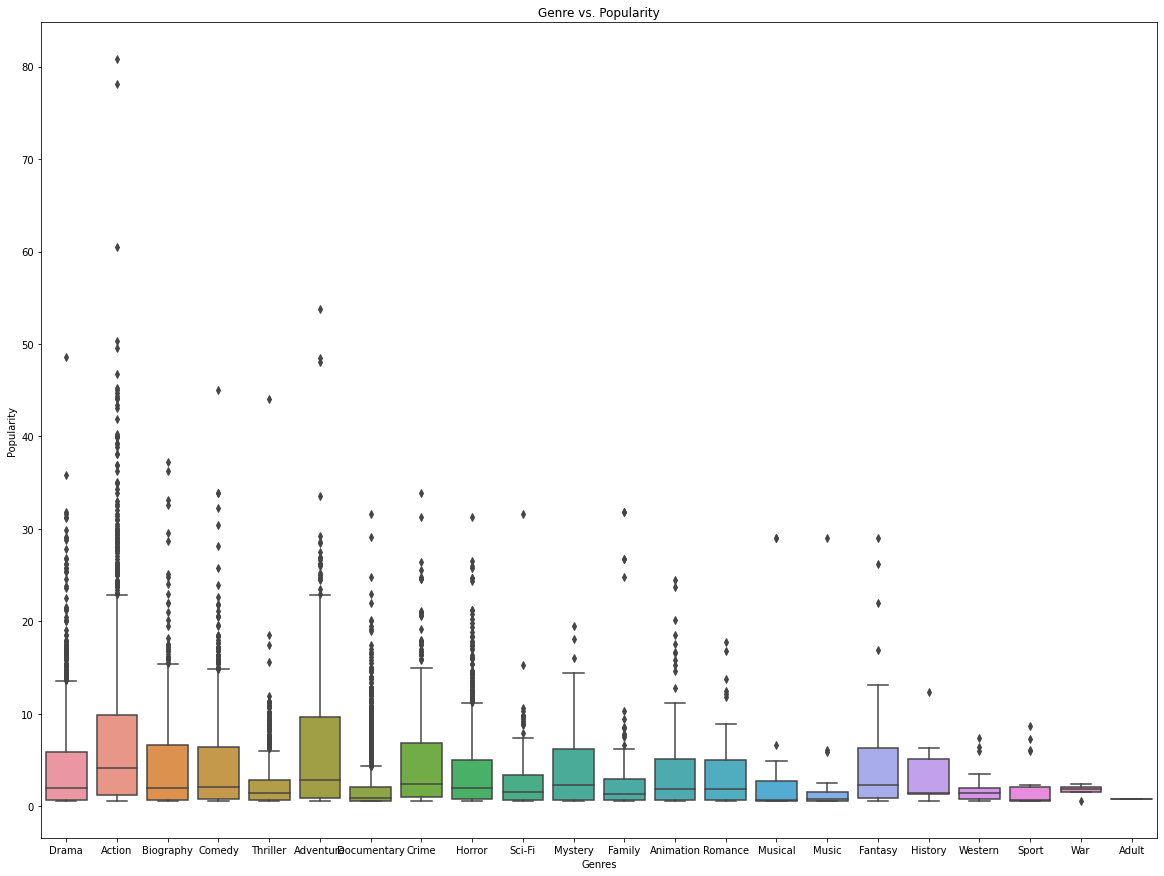

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(20,15)
sns.boxplot(data = imbd_tmdb_df, x= 'genres', y = 'popularity', ax = ax)
ax.set(title = "Genre vs. Popularity", xlabel = 'Genres', ylabel = 'Popularity')

Action, Adventure, Data, Comedy, and Thriller has the highest popularity rating

In [23]:
# create visualization for genre vs popularity & genre vs vote average

In [24]:
movie_budgets = 'tn.movie_budgets.csv.gz'

df_movie_budgets = pd.read_csv(f'zippedData/{movie_budgets}')
df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [25]:
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [26]:
movie_gross = 'bom.movie_gross.csv.gz'

df = pd.read_csv(f'zippedData/{movie_gross}')
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [27]:
df.head(11)
# Genres that have domestic gross = Animated, Action, Drama

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [28]:
df.tail(11)

,title,studio,domestic_gross,foreign_gross,year
3376,"Lou Andreas-Salomé, the Audacity to be Free",CLS,12900.0,NaN,2018
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [29]:
df.sort_values('domestic_gross')

,title,studio,domestic_gross,foreign_gross,year
1476,Storage 24,Magn.,100.0,NaN,2013
2321,The Chambermaid,FM,300.0,NaN,2015
2756,News From Planet Mars,KL,300.0,NaN,2016
2757,Satanic,Magn.,300.0,NaN,2016
1018,Apartment 143,Magn.,400.0,426000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


In [30]:
df.sort_values('domestic_gross').head(11)

,title,studio,domestic_gross,foreign_gross,year
1476,Storage 24,Magn.,100.0,NaN,2013
2321,The Chambermaid,FM,300.0,NaN,2015
2756,News From Planet Mars,KL,300.0,NaN,2016
2757,Satanic,Magn.,300.0,NaN,2016
1018,Apartment 143,Magn.,400.0,426000,2012
3078,2:22,Magn.,400.0,NaN,2017
3077,Max & Leon,Distrib.,500.0,NaN,2017
1126,Death of a Superhero,Trib.,600.0,NaN,2012
2920,Amityville: The Awakening,W/Dim.,700.0,7700000,2017
1475,Into the White,Magn.,700.0,NaN,2013


In [31]:
df.sort_values('domestic_gross').tail(11)

,title,studio,domestic_gross,foreign_gross,year
1342,All the Boys Love Mandy Lane,RTWC,NaN,1900000,2013
1368,6 Souls,RTWC,NaN,852000,2013
1659,Jessabelle,LGF,NaN,7000000,2014
1681,14 Blades,RTWC,NaN,3800000,2014
1685,Jack and the Cuckoo-Clock Heart,Shout!,NaN,3400000,2014
1739,Lila Lila,Crnth,NaN,1100000,2014
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


In [32]:
movie_info = 'rt.movie_info.tsv.gz'

movie_info_data = pd.read_table(f'zippedData/{movie_info}')
movie_info_data

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [33]:
movie_info_data.sort_values('box_office')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
86,108,A picture-perfect family moves into an upscale...,R,Comedy|Drama|Kids and Family,Derrick Borte,Derrick Borte,"Apr 16, 2010","Aug 10, 2010",$,"1,000,000",93 minutes,Roadside Attractions
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
809,1046,Writer/director Rodrigo Garca (Nine Lives) tea...,R,Drama,NaN,NaN,"May 7, 2010","Dec 14, 2010",$,"1,110,286",126 minutes,Sony Pictures Classics
1087,1398,"A heartfelt tale of inspiration, hope and rede...",PG,Drama|Kids and Family|Faith and Spirituality,David Nixon|Patrick Doughtie,NaN,"Apr 9, 2010","Aug 10, 2010",$,"1,121,000",110 minutes,Vivendi Entertainment
1213,1564,Real-life sweethearts Michael Cera and Charlyn...,PG-13,Comedy,Nicholas Jasenovec,Nicholas Jasenovec|Charlyne Yi,"Aug 14, 2009","Dec 1, 2009",$,"1,149,350",89 minutes,Overture Films
...,...,...,...,...,...,...,...,...,...,...,...,...
1554,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
